In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import sep as sep
import Data
import os
import seaborn as sns
import matplotlib.lines as mlines

In [2]:
root_path = 'Y:\Lior&Einav\Experiments'
exp_details = pd.read_excel(root_path + sep + 'Experiments_details.xlsx')
exp_details

,Experiment,Larvae_present,Colony,P_yellow,C_yellow,P_red,C_red
0,pilot,no,B,2,1,1,3
1,11,yes,A,2,1,1,3
2,12,no,A,2,1,1,3
3,13,no,A,2,1,1,3
4,16,no,B,2,1,1,3
5,17,no,B,2,1,1,3
6,18,yes,A,2,1,1,3
7,19,yes,A,2,1,1,3
8,20,yes,A,2,1,1,3
9,21,no,B,2,1,1,3


In [3]:
idx, exp =next(exp_details.iterrows())
ratios=[[exp.P_yellow,exp.C_yellow],[exp.P_red,exp.C_red]]
ratios

[[2, 1], [1, 3]]

In [4]:
def get_experiment_PC(exp_num, root_path, ratios):
    exp_num = str(exp_num)
    if exp_num == 'pilot':
        exp_folder = 'pilot experiment dig10 7_6_20'
    else:
        exp_folder = [d for d in os.listdir(root_path) if d.startswith('experiment'+exp_num)][0]
    
    weights_df = pd.read_excel(root_path + sep + exp_folder + sep +'weights.xlsx')
    consumed_g = get_consumed_weights(weights_df)
    
    P_mg, C_mg = [0,0]
    for color, ratio in zip(['yellow','red'], ratios):
        P_mg_color, C_mg_color = Data.food_volume_to_PC_amounts(consumed_g[color]*1000, ratio)
        P_mg += P_mg_color
        C_mg += C_mg_color
    
    return P_mg, C_mg    

In [5]:
def get_consumed_weights(weights_df):
    weights_df['difference'] = weights_df['before_g']-weights_df['after_g']
    control_rows = weights_df['type']=='control'
    treatment_rows = ~control_rows
    evap = np.mean(weights_df['difference'][control_rows])
    consumed_g = {}
    for c in ['yellow','red']:
        consumed_g[c] = weights_df.difference[treatment_rows & (weights_df['color']==c)].to_numpy()[0] - evap
    return consumed_g

In [6]:
intake = []
for idx, exp in exp_details.iterrows():
    ratios=[[exp.P_yellow,exp.C_yellow],[exp.P_red,exp.C_red]]
    row = pd.Series()
    row['Experiment']= exp['Experiment']
    row['Colony']= exp['Colony']
    row['P_mg'], row['C_mg'] = get_experiment_PC(exp['Experiment'],root_path,ratios=ratios)
    intake.append(row)
    intake_df = pd.DataFrame(intake)
    
intake_df

    

,Experiment,Colony,P_mg,C_mg
0,pilot,B,17.825000,26.060000
1,11,A,28.363500,23.150500
2,12,A,23.537625,22.825375
3,13,A,28.234417,23.736583
4,16,B,14.727208,24.945792
5,17,B,17.803625,25.313375
6,18,A,24.763125,31.051875
7,19,A,21.560875,22.100125
8,20,A,16.885250,28.350750
9,21,B,14.056208,26.497792


Text(51, 23, '1:2')

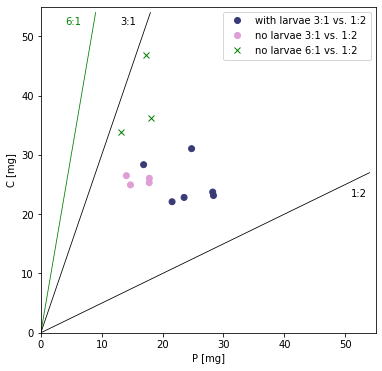

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
rows_6_1 = exp_details.C_red==6
sc = ax.scatter(intake_df.P_mg[~rows_6_1], intake_df.C_mg[~rows_6_1], c = pd.Categorical(intake_df.Colony[~rows_6_1]).codes, cmap='tab20b')
sc6 = ax.plot(intake_df.P_mg[rows_6_1], intake_df.C_mg[rows_6_1], 'xg')
green_x = mlines.Line2D([], [], color='g', marker='x', linestyle='none', label='no larvae C:P 1:2 vs. 1:6')
first_legend=plt.legend(handles=[green_x])
plt.xlabel('P [mg]')
plt.ylabel('C [mg]')
plt.plot([0, 54],[0, 27],'k',linewidth=0.8)
plt.plot([0,18],[0, 54],'k',linewidth=0.8)
plt.plot([0,9],[0,54],'g',linewidth=0.8)
# ax.add_artist(first_legend)
jj = sc.legend_elements()[0]
jj.append(green_x)
ax.legend(jj, ['with larvae 3:1 vs. 1:2', 'no larvae 3:1 vs. 1:2','no larvae 6:1 vs. 1:2'])
plt.xlim([0,55])
plt.ylim([0,55])
plt.text(4,52,'6:1',{'color':'g'})
plt.text(13,52,'3:1')
plt.text(51,23,'1:2')

In [21]:
%matplotlib qt
fig2, ax2 = plt.subplots(figsize=(4.5,4.5))
sns.set_style("white")
plt.xlabel('P [mg]')
plt.ylabel('C [mg]')
plt.plot([0, 54],[0, 27],'m',linewidth=0.8)
plt.plot([0, 54],[0, 27],'--g',linewidth=0.8)
plt.plot([0,18],[0, 54],'m',linewidth=0.8)
plt.plot([0,9],[0,54],'g',linewidth=0.8)
num2color = {'6':'g',6:'g','3':'m',3:'m'}
edges_c = [num2color[n] for n in exp_details.C_red]
g = sns.scatterplot(data=intake_df, x='P_mg', y='C_mg',style='Colony', hue=exp_details.C_red,
                    ax=ax2, markers={'A':'s','B':'$\u25EF$'}, palette=['m','g'], edgecolor=edges_c,s=45)
#plt.legend(loc='right', bbox_to_anchor=(1.35, 0.5), ncol=1)
leg=g.get_legend()
new_labels=['Food types C:P','3:1 vs. 1:2','6:1 vs. 1:2','','without larvae','with larvae']
for t, l in zip(leg.texts, new_labels): 
    t.set_text(l)
